# 5 -- Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# load training set
ytrain = []
Xtrain = []
with open('digits-train.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',',lineterminator='\n')
    for row in reader:
        ytrain.append( int(float(row[0])) )
        Xtrain.append( [float(j) for j in row[1:] ])
    
Xtrain = np.array(Xtrain)
ytrain = np.array(ytrain)

In [3]:
# load testing set
ytest = []
Xtest = []
with open('digits-test.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',',lineterminator='\n')
    for row in reader:
        ytest.append( int(float(row[0])) )
        Xtest.append( [float(j) for j in row[1:] ])

Xtest = np.array(Xtest)
ytest = np.array(ytest)

# 5A

Working on depth=1
1
Working on depth=2
2
Working on depth=3
3
Working on depth=4
4
Working on depth=5
5
Working on depth=6
6
Working on depth=7
7
Working on depth=8
8
Working on depth=9
9
Working on depth=10
10
Working on depth=11
11
Working on depth=12
12
Working on depth=13
13
Working on depth=14
14
Working on depth=15
14
Working on depth=16
15
Working on depth=17
15
Working on depth=18
14
Working on depth=19
14
Working on depth=20
15
The best max_depth=13 with test acc = 0.5743
The plots are included above


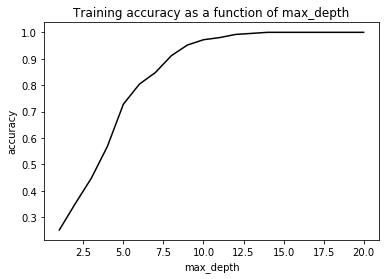

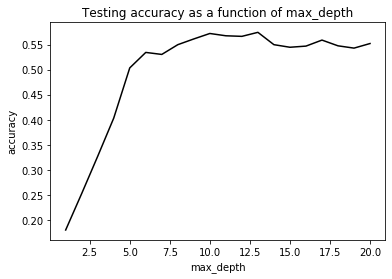

In [8]:
# Now make plots of Training Accuracy and plots of Testing Accuracy for KNN for k in {1,3,5,7,9,11,13,15}

trainacc = []
testacc = []
depthrange = range(1,21,1)
for depth in depthrange:
    print('Working on depth=%i'%(depth))
    clf = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=depth)
    clf.fit(Xtrain, ytrain)
    actualdepth = int(clf.get_depth())
#     print(depth)
    print(actualdepth)
#     print('maxdepth = %i depth=%i'(depth, actualdepth))
    trainacc.append( clf.score(Xtrain,ytrain) )
    testacc.append( clf.score(Xtest,ytest) )
#     print('\tThe training accuracy is %.4f'%(clf.score(Xtrain,ytrain)))
#     print('\tThe testing accuracy is %.4f'%(clf.score(Xtest,ytest)))

    
plt.figure()

plt.plot(depthrange,trainacc,color='black')
plt.title('Training accuracy as a function of max_depth')
plt.xlabel('max_depth')
plt.ylabel('accuracy')

plt.figure()

plt.plot(depthrange,testacc,color='black')
plt.title('Testing accuracy as a function of max_depth')
plt.xlabel('max_depth')
plt.ylabel('accuracy')

idx = testacc.index(max(testacc))
print('The best max_depth=%i with test acc = %.4f'%(depthrange[idx],max(testacc)))
print('The plots are included above')

# 5 B  -- Bagging

The best num_trees=200 for max_depth=1 with test acc = 0.3069
The best num_trees=50 for max_depth=2 with test acc = 0.4354
The best num_trees=50 for max_depth=3 with test acc = 0.4909
The best num_trees=10 for max_depth=4 with test acc = 0.5331
The best num_trees=50 for max_depth=5 with test acc = 0.5823
The best num_trees=10 for max_depth=6 with test acc = 0.6063
The best num_trees=200 for max_depth=7 with test acc = 0.6349
The best num_trees=50 for max_depth=8 with test acc = 0.6389
The best num_trees=200 for max_depth=9 with test acc = 0.6446
The best num_trees=100 for max_depth=10 with test acc = 0.6451
The best num_trees=200 for max_depth=11 with test acc = 0.6497
The best num_trees=50 for max_depth=12 with test acc = 0.6423
The best num_trees=25 for max_depth=13 with test acc = 0.6491
The best num_trees=200 for max_depth=14 with test acc = 0.6394
The best num_trees=100 for max_depth=15 with test acc = 0.6434
The best num_trees=200 for max_depth=16 with test acc = 0.6480
The best 

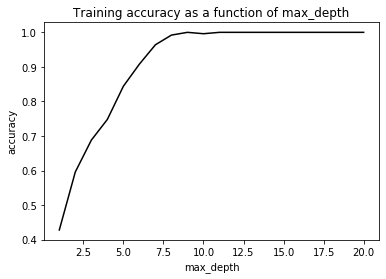

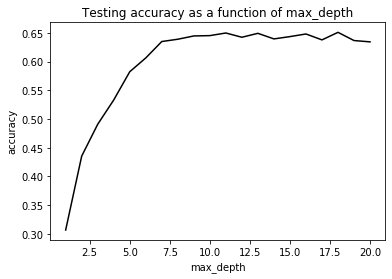

The best max_depth=18 with test acc = 0.6509


In [9]:
# num_trees= 100
numtreerange = [1,5,10,25,50,100,200]
overalltestacc = []
overalltrainacc=[]
depthrange = range(1,21,1)
for depth in depthrange:
    
    best_num_trees = 0
    best_acc = 0
    
    for num_trees in numtreerange:
        clf = RandomForestClassifier(bootstrap=True,n_estimators=num_trees,max_features=None,criterion='gini',max_depth=depth)
        clf.fit(Xtrain, ytrain)
        
        testacc= clf.score(Xtest,ytest) 
        if testacc >= best_acc:
            best_acc = testacc
            best_num_trees = num_trees
            #print('\t\tnum_trees=%i for max_depth=%i with test acc = %.4f'%(num_trees,depth,testacc))
    
    #print('The best num_trees=%i for max_depth=%i with test acc = %.4f'%(best_num_trees,depth,best_acc))
    
    clf = RandomForestClassifier(bootstrap=True,n_estimators=best_num_trees,max_features=None,criterion='gini',max_depth=depth)
    clf.fit(Xtrain, ytrain)        
    overalltrainacc.append( clf.score(Xtrain,ytrain) )
    overalltestacc.append( clf.score(Xtest,ytest) ) 
    print('The best num_trees=%i for max_depth=%i with test acc = %.4f'%(best_num_trees,depth,clf.score(Xtest,ytest)))
    
    
plt.figure()

plt.plot(depthrange,overalltrainacc,color='black')
plt.title('Training accuracy as a function of max_depth')
plt.xlabel('max_depth')
plt.ylabel('accuracy')

plt.figure()

plt.plot(depthrange,overalltestacc,color='black')
plt.title('Testing accuracy as a function of max_depth')
plt.xlabel('max_depth')
plt.ylabel('accuracy')    
    
plt.show()

idx = overalltestacc.index(max(overalltestacc))
print('The best max_depth=%i with test acc = %.4f'%(depthrange[idx],overalltestacc[idx]))

So for this data set, Bagging does improve noticeably over single decision trees.

# 5C: Random forest

The best num_trees=25 for depth=1 with test acc = 0.4166
The best num_trees=50 for depth=2 with test acc = 0.5029
The best num_trees=200 for depth=3 with test acc = 0.6046
The best num_trees=200 for depth=4 with test acc = 0.6400
The best num_trees=200 for depth=5 with test acc = 0.6657
The best num_trees=100 for depth=6 with test acc = 0.6823
The best num_trees=100 for depth=7 with test acc = 0.6977
The best num_trees=200 for depth=8 with test acc = 0.7206
The best num_trees=200 for depth=9 with test acc = 0.7103
The best num_trees=200 for depth=10 with test acc = 0.7229
The best num_trees=200 for depth=11 with test acc = 0.7143
The best num_trees=200 for depth=12 with test acc = 0.7200
The best num_trees=200 for depth=13 with test acc = 0.7229
The best num_trees=200 for depth=14 with test acc = 0.7229
The best num_trees=100 for depth=15 with test acc = 0.7091
The best num_trees=200 for depth=16 with test acc = 0.7149
The best num_trees=200 for depth=17 with test acc = 0.7229
The best

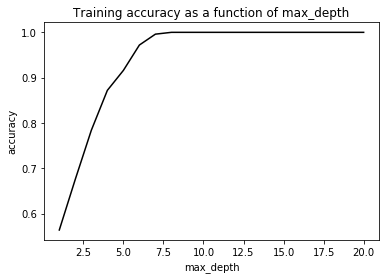

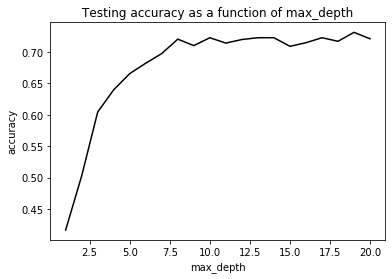

The best max_depth=19 with test acc = 0.7314


In [10]:

numtreerange = [1,5,10,25,50,100,200]
overalltestacc = []
overalltrainacc=[]
depthrange = range(1,21,1)
for depth in depthrange:
    
    best_num_trees = 0
    best_acc = 0
    
    for num_trees in numtreerange:
        clf = RandomForestClassifier(bootstrap=True,n_estimators=num_trees,max_features='sqrt',criterion='gini',max_depth=depth)
        clf.fit(Xtrain, ytrain)
        
        testacc= clf.score(Xtest,ytest) 
        if testacc >= best_acc:
            best_acc = testacc
            best_num_trees = num_trees
        
    clf = RandomForestClassifier(bootstrap=True,n_estimators=best_num_trees,max_features='sqrt',criterion='gini',max_depth=depth)
    clf.fit(Xtrain, ytrain)        
    overalltrainacc.append( clf.score(Xtrain,ytrain) )
    overalltestacc.append( clf.score(Xtest,ytest) )
    print('The best num_trees=%i for depth=%i with test acc = %.4f'%(best_num_trees,depth,clf.score(Xtest,ytest)))

    
plt.figure()

plt.plot(depthrange,overalltrainacc,color='black')
plt.title('Training accuracy as a function of max_depth')
plt.xlabel('max_depth')
plt.ylabel('accuracy')

plt.figure()

plt.plot(depthrange,overalltestacc,color='black')
plt.title('Testing accuracy as a function of max_depth')
plt.xlabel('max_depth')
plt.ylabel('accuracy')    
    
plt.show()

idx = overalltestacc.index(max(overalltestacc))
print('The best max_depth=%i with test acc = %.4f'%(depthrange[idx],overalltestacc[idx]))

# 5 D: Boosting


Working on depth = 1
The best rate=1.000e-01 and num_trees=150 for max_depth with test acc = 0.6680

Working on depth = 2
The best rate=1.000e-01 and num_trees=150 for max_depth with test acc = 0.6754

Working on depth = 3
The best rate=7.743e-02 and num_trees=150 for max_depth with test acc = 0.6669

Working on depth = 4
The best rate=1.000e-01 and num_trees=100 for max_depth with test acc = 0.6646

Working on depth = 5
The best rate=1.000e-01 and num_trees=100 for max_depth with test acc = 0.6377


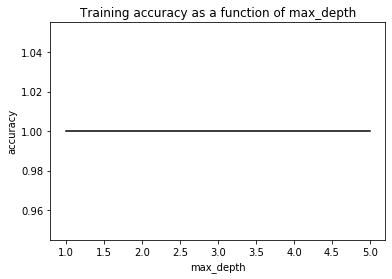

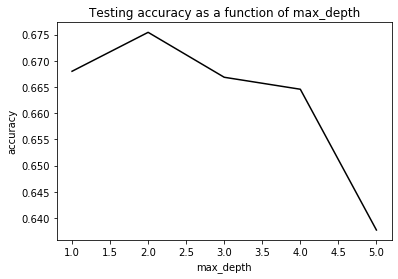

In [7]:
learnrange = np.logspace(-2,-1,10,base=10)
depthrange = range(1,6) 
numtreerange = [50,100,150]

overalltestacc = []
overalltrainacc = []

for depth in depthrange:
    print('\nWorking on depth = %i'%(depth))

    best_num_trees = 0
    best_rate = 0 
    best_acc = 0
    
    for num_trees in numtreerange:
        for rate in learnrange:
            # we create an instance of  Classifier and fit the data.
            clf = GradientBoostingClassifier(learning_rate=rate, n_estimators=num_trees,max_depth=depth )
            clf.fit(Xtrain, ytrain)

            testacc= clf.score(Xtest,ytest) 
            if testacc>best_acc:
                best_acc = testacc
                best_rate = rate
                best_num_trees = num_trees

    #retrain with this best rate
    clf = GradientBoostingClassifier(learning_rate=best_rate, n_estimators=best_num_trees,max_depth=depth )
    clf.fit(Xtrain, ytrain)    
    
    overalltrainacc.append( clf.score(Xtrain,ytrain) )
    overalltestacc.append( clf.score(Xtest,ytest) )   
    print('The best rate=%.3e and num_trees=%i for max_depth with test acc = %.4f'%(best_rate,best_num_trees,clf.score(Xtest,ytest)))
    
plt.figure()

plt.plot(depthrange,overalltrainacc,color='black')
plt.title('Training accuracy as a function of max_depth')
plt.xlabel('max_depth')
plt.ylabel('accuracy')

plt.figure()

plt.plot(depthrange,overalltestacc,color='black')
plt.title('Testing accuracy as a function of max_depth')
plt.xlabel('max_depth')
plt.ylabel('accuracy')    

plt.show()

# 5 E

(this answer is more verbose than expected)

In terms of performance, single decision trees did ok (around 55% accuracy, compared to 10% with random guessing), with noticeable improvements as we then did bagging (66%) then random forests (72%).  Boosting did about as well as bagging (67%).  With boosting, it is possible with a more thorough parameter search over the learning rate and number of trees, that could be improved.  The training accuracy was 100% for each max_depth value, which is suggestive of over-fitting.  

As seen on the previous data set, boosting is able to achieve 100% training accuracy with shallow trees, suggesting how powerful adapting trees to previous trees' mistakes is as opposed to independently generating (like bagging and random forest) and then averaging.

In terms of run-time, single decision trees was the fastest.  Bagging and random forest classifiers were slower to find, as we searched over the number of trees to use, but still ok.  Boosting was noticeably slower; this was expected since we are doing a search over two parameters (30 combinations for boosting as opposed to 7 for bagging/random forests).  But with boosting, it appeared to be more than 4 times slower.  We recall that with boosting, it is done sequentially and more work is done to identify which samples were hard to train.  (we could do time-tests to confirm the actual increase in time)
